## Install Requirements

In [21]:
# install ultralytic
#!pip3 install git+https://github.com/ultralytics/ultralytics.git
#!pip3 install kaggle opendatasets


In [22]:
#!pip install ultralytics
#!pip install pydantic

In [2]:
import os 
os.chdir('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/')

## Download Dataset

Yoga pose image dataset from kaggle  public dataset https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification this use 5 yoga pose

In [24]:
# Download kaggle dataset
#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/ujjwalchowdhury/yoga-pose-classification')

In [25]:
#!ls /content/yoga-pose-classification/YogaPoses

## Yolov8 Pose

In [3]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

In [4]:
model = ultralytics.YOLO(model='yolov8m-pose.pt')

from ultralytics import YOLO
import cv2
from PIL import Image

model_path = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/runs/pose/train2/weights/best.pt'

 
model = YOLO(model_path)



In [5]:
#image = cv2.imread('/home/skpark/git/yolov8/YogaPoses/Tree/00000002.jpg')
image = cv2.imread('/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog/bodylower/frame_0_timestamp_0.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy



0: 640x384 (no detections), 63.3ms
Speed: 2.6ms preprocess, 63.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


tensor([], device='cuda:0', size=(0, 4))

In [6]:
result.keypoints[0]

#result.keypoints[0].length()

ultralytics.yolo.engine.results.Keypoints object with attributes:

conf: None
data: tensor([], device='cuda:0', size=(1, 0, 117))
has_visible: False
orig_shape: (1280, 720)
shape: torch.Size([1, 0, 117])
xy: tensor([], device='cuda:0', size=(1, 0, 2))
xyn: tensor([], device='cuda:0', size=(1, 0, 2))

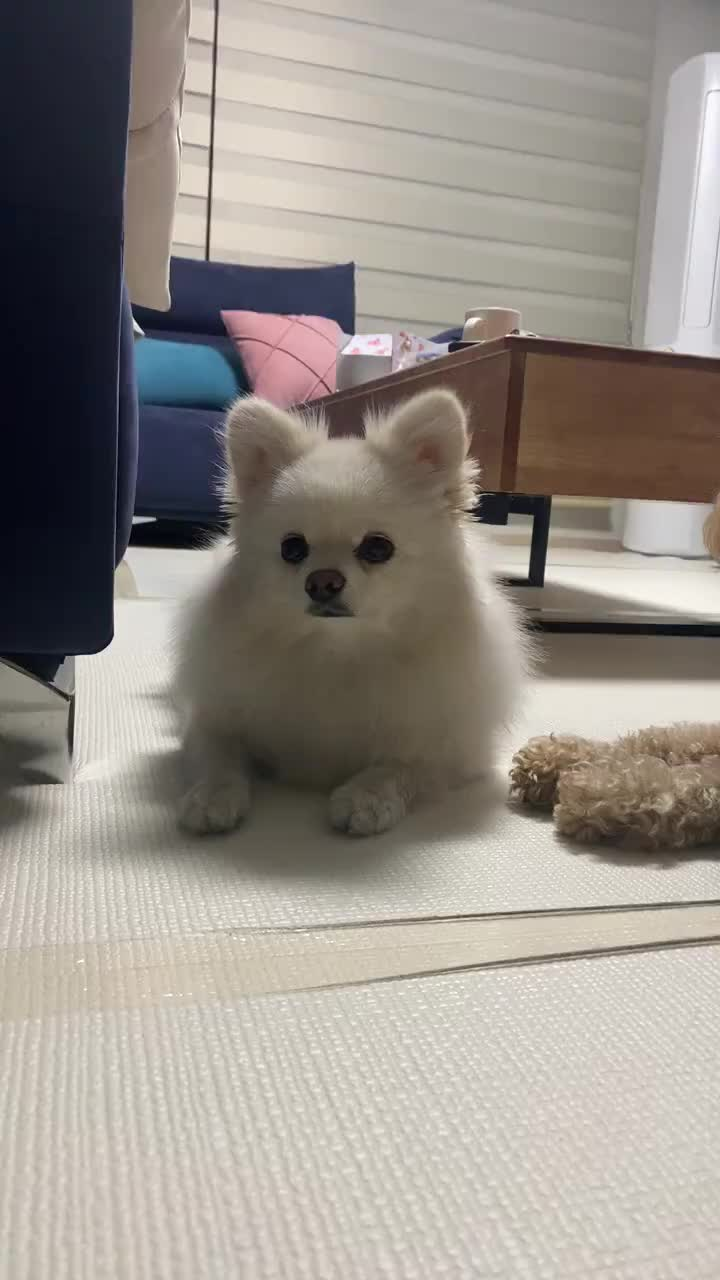

In [7]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

## Generate Dataset

### Keypoint extract

Yolov8 pose estimation memiliki 17 keypoint 
* NOSE:           int = 0
* LEFT_EYE:       int = 1
* RIGHT_EYE:      int = 2
* LEFT_EAR:       int = 3
* RIGHT_EAR:      int = 4
* LEFT_SHOULDER:  int = 5
* RIGHT_SHOULDER: int = 6
* LEFT_ELBOW:     int = 7
* RIGHT_ELBOW:    int = 8
* LEFT_WRIST:     int = 9
* RIGHT_WRIST:    int = 10
* LEFT_HIP:       int = 11
* RIGHT_HIP:      int = 12
* LEFT_KNEE:      int = 13
* RIGHT_KNEE:     int = 14
* LEFT_ANKLE:     int = 15
* RIGHT_ANKLE:    int = 16

In [62]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    UPPER_JAW:           int = 1
    LOWER_JAW:           int = 2
    MOUTH_END_RIGHT:           int = 3
    MOUTH_END_LEFT:           int = 4
    
    RIGHT_EYE:           int = 5
    RIGHT_EARBASE:           int = 6
    RIGHT_EAREND:           int = 7
    RIGHT_ANTLER_BASE:           int = 8
    RIGHT_ANTLER_END:           int = 9
    
    LEFT_EYE:           int = 10
    LEFT_EARBASE:           int = 11
    LEFT_EAREND:           int = 12
    LEFT_ANTLER_BASE:           int = 13
    LEFT_ANTLER_END:           int = 14
    
    NECK_BASE:           int = 15
    NECK_END:           int = 16
    THROAT_BASE:           int = 17
    THROAT_END:           int = 18
    BACK_BASE:           int =19
    BACK_END:           int = 20
    BACK_MIDDLE:           int = 21
    TAIL_BASE:           int = 22
    TAIL_END:           int = 23
    
    FRONT_LEFT_THAI:           int = 24
    FRONT_LEFT_KNEE:           int = 25
    FRONT_LEFT_PAW:           int = 26
    
    FRONT_RIGHT_THAI:           int = 27
    FRONT_RIGHT_PAW:           int = 28
    FRONT_RIGHT_KNEE:           int = 29
    
    BACK_LEFT_KNEE:           int = 30
    BACK_LEFT_PAW:           int = 31
    BACK_LEFT_THAI:           int = 32
    
    BACK_RIGHT_THAI:           int = 33
    BACK_RIGHT_PAW:           int = 34
    BACK_RIGHT_KNEE:           int = 35
    
    BELLY_BOTTOM:           int = 36
    BODY_MIDDLE_RIGHT:           int = 37
    BODY_MIDDLE_LEFT:           int = 38 
get_keypoint = GetKeypoint()

In [63]:
import os
import glob

In [64]:
dataset_root = '/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog'
pose_list = os.listdir(dataset_root)
pose_list

['feetup',
 'lying',
 'heading',
 'bodylower',
 'footup',
 'tailing',
 'sit',
 'bodyscratch',
 'mounting',
 'bodyshake']

In [65]:
def extract_keypoint(keypoint) -> list:
        # nose
        nose_x, nose_y = keypoint[get_keypoint.NOSE]
        upper_jaw_x,upper_jaw_y  = keypoint[get_keypoint.UPPER_JAW]
        mouth_end_right_x,mouth_end_right_y = keypoint[get_keypoint.MOUTH_END_RIGHT]
        mouth_end_left_x,mouth_end_left_y = keypoint[get_keypoint.MOUTH_END_LEFT]
        right_eye_x,right_eye_y  = keypoint[get_keypoint.RIGHT_EYE]
        right_earbase_x,right_earbase_y = keypoint[get_keypoint.RIGHT_EARBASE]
        right_earend_x,right_earend_y = keypoint[get_keypoint.RIGHT_EAREND]
        right_antler_base_x,right_antler_base_y = keypoint[get_keypoint.RIGHT_ANTLER_BASE]
        right_antler_end_x,right_antler_end_y = keypoint[get_keypoint.RIGHT_ANTLER_END]
        left_eye_x,left_eye_y= keypoint[get_keypoint.LEFT_EYE]
        left_earbase_x,left_earbase_y = keypoint[get_keypoint.LEFT_EARBASE]
        left_earend_x,left_earend_y = keypoint[get_keypoint.LEFT_EAREND]
        left_antler_base_x,left_antler_base_y = keypoint[get_keypoint.LEFT_ANTLER_BASE]
        left_antler_end_x,left_antler_end_y = keypoint[get_keypoint.LEFT_ANTLER_END]
        neck_base_x,neck_base_y = keypoint[get_keypoint.NECK_BASE]
        neck_end_x,neck_end_y = keypoint[get_keypoint.NECK_END]
        throat_base_x,throat_base_y = keypoint[get_keypoint.THROAT_BASE]
        throat_end_x,throat_end_y = keypoint[get_keypoint.THROAT_END]
        back_base_x,back_base_y = keypoint[get_keypoint.BACK_BASE]
        back_end_x,back_end_y = keypoint[get_keypoint.BACK_END]
        back_middle_x,back_middle_y = keypoint[get_keypoint.BACK_MIDDLE]
        tail_base_x,tail_base_y = keypoint[get_keypoint.TAIL_BASE]
        tail_end_x,tail_end_y = keypoint[get_keypoint.TAIL_END]
        front_left_thai_x,front_left_thai_y = keypoint[get_keypoint.FRONT_LEFT_THAI]
        front_left_knee_x,front_left_knee_y = keypoint[get_keypoint.FRONT_LEFT_KNEE]
        front_left_paw_x,front_left_paw_y = keypoint[get_keypoint.FRONT_LEFT_PAW]
        front_right_thai_x,front_right_thai_y = keypoint[get_keypoint.FRONT_RIGHT_THAI]
        front_right_paw_x,front_right_paw_y = keypoint[get_keypoint.FRONT_RIGHT_PAW]
        front_right_knee_x,front_right_knee_y = keypoint[get_keypoint.FRONT_RIGHT_KNEE]
        back_left_knee_x,back_left_knee_y = keypoint[get_keypoint.BACK_LEFT_KNEE]
        back_left_paw_x,back_left_paw_y = keypoint[get_keypoint.BACK_LEFT_PAW]
        back_left_thai_x,back_left_thai_y = keypoint[get_keypoint.BACK_LEFT_THAI]
        back_right_thai_x,back_right_thai_y = keypoint[get_keypoint.BACK_RIGHT_THAI]
        back_right_paw_x,back_right_paw_y = keypoint[get_keypoint.BACK_RIGHT_PAW]
        back_right_knee_x,back_right_knee_y = keypoint[get_keypoint.BACK_RIGHT_KNEE]
        belly_bottom_x,belly_bottom_y = keypoint[get_keypoint.BELLY_BOTTOM]
        body_middle_right_x,body_middle_right_y = keypoint[get_keypoint.BODY_MIDDLE_RIGHT]
        body_middle_left_x,body_middle_left_y = keypoint[get_keypoint.BODY_MIDDLE_LEFT]

        
        return [
            nose_x, nose_y ,upper_jaw_x,upper_jaw_y  ,mouth_end_right_x,mouth_end_right_y ,mouth_end_left_x,mouth_end_left_y ,right_eye_x,right_eye_y  ,
        right_earbase_x,right_earbase_y,right_earend_x,right_earend_y ,right_antler_base_x,right_antler_base_y ,
        right_antler_end_x,right_antler_end_y,left_eye_x,left_eye_y,
        left_earbase_x,left_earbase_y, left_earend_x,left_earend_y ,
        left_antler_base_x,left_antler_base_y,left_antler_end_x,left_antler_end_y ,
        neck_base_x,neck_base_y , neck_end_x,neck_end_y ,
        throat_base_x,throat_base_y,throat_end_x,throat_end_y ,
        back_base_x,back_base_y ,back_end_x,back_end_y ,
        back_middle_x,back_middle_y, tail_base_x,tail_base_y,
        tail_end_x,tail_end_y , front_left_thai_x,front_left_thai_y,
        front_left_knee_x,front_left_knee_y ,front_left_paw_x,front_left_paw_y ,
        front_right_thai_x,front_right_thai_y ,front_right_paw_x,front_right_paw_y ,
        front_right_knee_x,front_right_knee_y ,    back_left_knee_x,back_left_knee_y ,
        back_left_paw_x,back_left_paw_y , back_left_thai_x,back_left_thai_y ,
        back_right_thai_x,back_right_thai_y,  back_right_paw_x,back_right_paw_y ,
        back_right_knee_x,back_right_knee_y,  belly_bottom_x,belly_bottom_y ,
        body_middle_right_x,body_middle_right_y ,  body_middle_left_x,body_middle_left_y   ]

### Run image

In [66]:
dataset_csv = []
print(dataset_root)
print(pose_list)
for pose in pose_list:
    print(pose)
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        # get image_name
        image_name = image_path.split('/')[-1]
        print(image_name)
        # read numpy image
        image = cv2.imread(image_path)
        
        # get height width image
        height, width = image.shape[:2]
        print(height,width)
        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        print(results)
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 39:
                print("result_keypoint=====>")
                print( result_keypoint)
       
                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                print('image_name==============================>'+image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)
        # break
    # break
print(dataset_csv)


0: 640x384 1 quadruped, 5.3ms
Speed: 8.2ms preprocess, 5.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.6ms
Speed: 0.8ms preprocess, 4.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.8ms
Speed: 1.3ms preprocess, 5.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 4.8ms
Speed: 0.9ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 4.8ms
Speed: 1.0ms preprocess, 4.8ms inference, 0.9ms postprocess per im

/home/skpark/git/pose-detection-keypoints-estimation-yolov8/dog
['feetup', 'lying', 'heading', 'bodylower', 'footup', 'tailing', 'sit', 'bodyscratch', 'mounting', 'bodyshake']
feetup
frame_125_timestamp_4190.jpg
1280 720
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [147, 149, 130],
        [147, 149, 130],
        [147, 149, 130]],

       [[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [147, 149, 130],
        [147, 149, 130],
        [147, 149, 130]],

       [[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [147, 149, 130],
        [147, 149, 130],
        [147, 149, 130]],

       ...,

       [[ 74,  72, 

0: 640x384 (no detections), 4.8ms
Speed: 1.0ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 4.9ms
Speed: 1.0ms preprocess, 4.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 5.1ms
Speed: 0.9ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.8ms
Speed: 1.0ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 4.9ms
Speed: 1.0ms preprocess, 4.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 4.9ms
Speed: 0.9ms preprocess, 4.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.7ms postprocess per ima

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [151, 151, 133],
        [151, 151, 133],
        [151, 151, 133]],

       [[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [151, 151, 133],
        [151, 151, 133],
        [151, 151, 133]],

       [[ 16,  14,  13],
        [ 16,  14,  13],
        [ 16,  14,  13],
        ...,
        [151, 151, 133],
        [151, 151, 133],
        [151, 151, 133]],

       ...,

       [[128, 126, 125],
        [139, 137, 136],
        [160, 158, 157],
        ...,
        [ 77,  82,  81],
        [ 71,  76,  75],
        [ 67,  72,  71]],

       [[ 96,  94,  93],
        [ 99,  97,  96],
        [113, 111, 110],



0: 640x384 (no detections), 4.8ms
Speed: 1.3ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.6ms 

1920 1080
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[103, 121, 152],
        [103, 121, 152],
        [103, 121, 152],
        ...,
        [202, 199, 194],
        [202, 199, 194],
        [202, 199, 194]],

       [[103, 121, 152],
        [103, 121, 152],
        [103, 121, 152],
        ...,
        [202, 199, 194],
        [202, 199, 194],
        [202, 199, 194]],

       [[103, 121, 152],
        [103, 121, 152],
        [103, 121, 152],
        ...,
        [202, 199, 194],
        [202, 199, 194],
        [202, 199, 194]],

       ...,

       [[ 61, 120, 190],
        [ 61, 120, 190],
        [ 61, 120, 190],
        ...,
        [ 77, 128, 201],
        [ 77, 128, 201],
        [ 77, 128, 201]],

       [[ 61, 120, 190],
        [ 61, 120, 190],
        [ 61, 1


0: 640x384 (no detections), 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.3ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.4ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 6.0ms
Speed: 0.9ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 4.9ms
Speed: 1.0ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.2ms
Speed: 0.9ms preprocess, 5.2ms inference, 1.0ms postprocess per

1920 1080
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[166, 191, 193],
        [166, 191, 193],
        [166, 191, 193],
        ...,
        [134,  78, 161],
        [134,  78, 161],
        [134,  78, 161]],

       [[166, 191, 193],
        [166, 191, 193],
        [166, 191, 193],
        ...,
        [134,  78, 161],
        [134,  78, 161],
        [134,  78, 161]],

       [[166, 191, 193],
        [166, 191, 193],
        [166, 191, 193],
        ...,
        [134,  78, 161],
        [134,  78, 161],
        [134,  78, 161]],

       ...,

       [[138, 146, 169],
        [138, 146, 169],
        [138, 146, 169],
        ...,
        [212, 206, 207],
        [212, 206, 207],
        [212, 206, 207]],

       [[140, 148, 171],
        [140, 148, 171],
        [140, 1


0: 640x384 2 quadrupeds, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.1ms
Speed: 1.1ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.2ms
Speed: 1.0ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 0.8ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.9ms postprocess per i

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[ 48,  36,  32],
        [ 48,  36,  32],
        [ 48,  36,  32],
        ...,
        [ 99,  97,  97],
        [ 99,  97,  97],
        [ 99,  97,  97]],

       [[ 48,  36,  32],
        [ 48,  36,  32],
        [ 48,  36,  32],
        ...,
        [ 99,  97,  97],
        [ 99,  97,  97],
        [ 99,  97,  97]],

       [[ 48,  36,  32],
        [ 48,  36,  32],
        [ 48,  36,  32],
        ...,
        [ 99,  97,  97],
        [ 99,  97,  97],
        [ 99,  97,  97]],

       ...,

       [[165, 176, 184],
        [167, 178, 186],
        [169, 180, 188],
        ...,
        [185, 196, 200],
        [185, 196, 200],
        [185, 196, 200]],

       [[165, 176, 184],
        [167, 178, 186],
        [169, 180, 188],



0: 640x384 (no detections), 6.5ms
Speed: 1.1ms preprocess, 6.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 4.9ms
Speed: 1.0ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 4.8ms
Speed: 1.0ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.8ms
Speed: 0.8ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 1.0ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 0.5ms postproc

1280 720
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[166, 169, 173],
        [158, 161, 165],
        [147, 150, 154],
        ...,
        [164, 158, 175],
        [164, 158, 175],
        [164, 158, 175]],

       [[159, 162, 166],
        [152, 155, 159],
        [141, 144, 148],
        ...,
        [138, 132, 149],
        [138, 132, 149],
        [138, 132, 149]],

       [[151, 154, 158],
        [144, 147, 151],
        [134, 137, 141],
        ...,
        [136, 130, 147],
        [136, 130, 147],
        [136, 130, 147]],

       ...,

       [[ 93,  79,  83],
        [ 93,  79,  83],
        [ 93,  79,  83],
        ...,
        [122, 122, 128],
        [141, 141, 147],
        [153, 153, 159]],

       [[ 93,  79,  83],
        [ 93,  79,  83],
        [ 93,  7

0: 640x384 (no detections), 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.6ms
Speed: 1.0ms preprocess, 5.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.7ms
Speed: 1.1ms preprocess, 5.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.1ms
Speed: 0.9ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.9ms
Speed: 1.0ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 quadruped, 5.0ms
Speed: 1.4ms preprocess, 5.0ms inference, 0.9ms postp

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[242, 241, 221],
        [242, 241, 221],
        [242, 241, 221],
        ...,
        [ 70,  78,  95],
        [ 70,  78,  95],
        [ 70,  78,  95]],

       [[242, 241, 221],
        [242, 241, 221],
        [242, 241, 221],
        ...,
        [ 68,  76,  93],
        [ 68,  76,  93],
        [ 68,  76,  93]],

       [[242, 241, 221],
        [242, 241, 221],
        [242, 241, 221],
        ...,
        [ 66,  74,  91],
        [ 66,  74,  91],
        [ 66,  74,  91]],

       ...,

       [[ 61, 166, 151],
        [ 61, 166, 151],
        [ 61, 166, 151],
        ...,
        [169, 205, 229],
        [169, 205, 229],
        [169, 205, 229]],

       [[ 61, 166, 151],
        [ 61, 166, 151],
        [ 61, 166, 151],


0: 384x640 (no detections), 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 quadruped, 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.9ms
Speed: 1.2ms preprocess, 4.9ms inference, 0.5ms postp

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[188, 193, 196],
        [188, 193, 196],
        [188, 193, 196],
        ...,
        [ 29,  73,  56],
        [ 29,  73,  56],
        [ 29,  73,  56]],

       [[188, 193, 196],
        [188, 193, 196],
        [188, 193, 196],
        ...,
        [ 32,  76,  59],
        [ 34,  76,  59],
        [ 32,  76,  59]],

       [[188, 193, 196],
        [188, 193, 196],
        [188, 193, 196],
        ...,
        [ 37,  79,  62],
        [ 39,  78,  62],
        [ 37,  79,  62]],

       ...,

       [[163, 161, 160],
        [163, 161, 160],
        [163, 161, 160],
        ...,
        [150, 146, 145],
        [150, 146, 145],
        [150, 146, 145]],

       [[163, 161, 160],
        [163, 161, 160],
        [163, 161, 160],



0: 384x640 (no detections), 5.3ms
Speed: 1.4ms preprocess, 5.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.0ms
Speed: 1.4ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 6.0ms
Speed: 1.7ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 5.4ms
Speed: 1.3ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 5.6ms
Speed: 1.4ms preprocess, 5.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 5.3ms
Speed: 1.7ms preprocess, 5.3ms inference, 1.0ms postprocess per

1080 1920
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[189, 194, 195],
        [189, 194, 195],
        [189, 194, 195],
        ...,
        [ 88,  92,  81],
        [ 88,  92,  81],
        [ 88,  92,  81]],

       [[189, 194, 195],
        [189, 194, 195],
        [189, 194, 195],
        ...,
        [ 88,  92,  81],
        [ 88,  92,  81],
        [ 88,  92,  81]],

       [[189, 194, 195],
        [189, 194, 195],
        [189, 194, 195],
        ...,
        [ 77,  81,  70],
        [ 77,  81,  70],
        [ 77,  81,  70]],

       ...,

       [[159, 160, 158],
        [159, 160, 158],
        [159, 160, 158],
        ...,
        [145, 143, 142],
        [145, 143, 142],
        [145, 143, 142]],

       [[159, 160, 158],
        [159, 160, 158],
        [159, 1

0: 384x640 2 quadrupeds, 4.9ms
Speed: 1.5ms preprocess, 4.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 4.8ms
Speed: 1.2ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 4.8ms
Speed: 1.3ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.1ms
Speed: 1.7ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 quadrupeds, 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.2ms
Speed: 1.2ms preprocess, 5.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.4ms
Speed: 1.3ms preprocess, 5.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 (no detections), 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.6ms postprocess p

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[ 25,  31,  44],
        [ 25,  31,  44],
        [ 25,  31,  44],
        ...,
        [141, 138, 123],
        [141, 138, 123],
        [141, 138, 123]],

       [[ 25,  31,  44],
        [ 25,  31,  44],
        [ 25,  31,  44],
        ...,
        [141, 138, 123],
        [141, 138, 123],
        [141, 138, 123]],

       [[ 25,  31,  44],
        [ 25,  31,  44],
        [ 25,  31,  44],
        ...,
        [141, 138, 123],
        [141, 138, 123],
        [141, 138, 123]],

       ...,

       [[181, 183, 184],
        [181, 183, 184],
        [181, 183, 184],
        ...,
        [151, 150, 159],
        [151, 150, 159],
        [151, 150, 159]],

       [[181, 183, 184],
        [181, 183, 184],
        [181, 183, 184],



0: 640x384 (no detections), 5.4ms
Speed: 1.2ms preprocess, 5.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 quadrupeds, 5.1ms
Speed: 1.2ms preprocess, 5.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.9ms
Speed: 1.3ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.0ms
Speed: 1.2ms preprocess, 5.0ms inference, 0.5ms pos

1920 1080
ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: ultralytics.yolo.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'quadruped'}
orig_img: array([[[183, 185, 186],
        [183, 185, 186],
        [183, 185, 186],
        ...,
        [159, 162, 167],
        [159, 162, 167],
        [159, 162, 167]],

       [[183, 185, 186],
        [183, 185, 186],
        [183, 185, 186],
        ...,
        [159, 162, 167],
        [159, 162, 167],
        [159, 162, 167]],

       [[183, 185, 186],
        [183, 185, 186],
        [183, 185, 186],
        ...,
        [159, 162, 167],
        [159, 162, 167],
        [159, 162, 167]],

       ...,

       [[ 65,  71,  90],
        [ 65,  71,  90],
        [ 65,  71,  90],
        ...,
        [141, 144, 158],
        [141, 144, 158],
        [141, 144, 158]],

       [[ 65,  71,  90],
        [ 65,  71,  90],
        [ 65,  

In [67]:
import csv
# write csv
header = ['image_name',
    'label',
     'nose_x', 'nose_y' ,'upper_jaw_x','upper_jaw_y'  ,'mouth_end_right_x','mouth_end_right_y','mouth_end_left_x','mouth_end_left_y','right_eye_x','right_eye_y'  ,
        'right_earbase_x','right_earbase_y','right_earend_x','right_earend_y' ,'right_antler_base_x','right_antler_base_y' ,
        'right_antler_end_x','right_antler_end_y','left_eye_x','left_eye_y',
        'left_earbase_x','left_earbase_y', 'left_earend_x','left_earend_y' ,
        'left_antler_base_x','left_antler_base_y','left_antler_end_x','left_antler_end_y' ,
        'neck_base_x,neck_base_y' , 'neck_end_x,neck_end_y' ,
        'throat_base_x','throat_base_y','throat_end_x','throat_end_y' ,
        'back_base_x','back_base_y' ,'back_end_x,back_end_y' ,
        'back_middle_x','back_middle_y', 'tail_base_x,tail_base_y',
        'tail_end_x','tail_end_y' , 'front_left_thai_x','front_left_thai_y',
        'front_left_knee_x','front_left_knee_y' ,'front_left_paw_x','front_left_paw_y' ,
        'front_right_thai_x','front_right_thai_y' ,'front_right_paw_x,front_right_paw_y' ,
        'front_right_knee_x','front_right_knee_y' ,    'back_left_knee_x,back_left_knee_y' ,
        'back_left_paw_x','back_left_paw_y' , 'back_left_thai_x,back_left_thai_y' ,
        'back_right_thai_x','back_right_thai_y',  'back_right_paw_x,back_right_paw_y' ,
        'back_right_knee_x','back_right_knee_y',  'belly_bottom_x,belly_bottom_y' ,
        'body_middle_right_x','body_middle_right_y' ,  'body_middle_left_x','body_middle_left_y'   
]

with open('yoga_pose_keypoint.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(dataset_csv)


### Write Dataset

In [68]:
import pandas as pd

df = pd.read_csv('yoga_pose_keypoint.csv')
df = df.drop('image_name', axis=1)
df.head()

label  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767  0.465468   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174  0.430887   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636  0.443273   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852  0.430204   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.455126  0.412194   

                                                                                                      nose_x  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767  0.340270   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174  0.339965   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636  0.344715   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852  0.340872   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.455126  0.330334   

                                                                                                      nose_y  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767  0.447144   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174  0.410096   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636  0.414581   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852  0.399038   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.455126  0.376016   

                                                                                                    upper_jaw_x  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767     0.333384   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174     0.328742   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636     0.334041   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852     0.333304   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.455126     0.326090   

                                                                                                    upper_jaw_y  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767     0.425237   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174     0.387733   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636     0.382992   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852     0.365581   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.455126     0.356238   

                                                                                                    mouth_end_right_x  \
frame_125_timestamp_4190.jpg feetup 0.491685 0.351411 0.490083 0.359745 0.464460 0.364021 0.489767           0.318346   
frame_113_timestamp_3788.jpg feetup 0.458289 0.355637 0.456721 0.363213 0.427998 0.365057 0.458174           0.309233   
frame_119_timestamp_3989.jpg feetup 0.480223 0.362767 0.477585 0.372385 0.443532 0.375350 0.486636           0.318073   
                                    0.470616 0.359361 0.470598 0.367231 0.444987 0.373867 0.478852           0.322654   
frame_137_timestamp_4592.jpg feetup 0.456647 0.346669 0.456061 0.354982 0.431373 0.362189 0.45512